Solution 1:


,x,y,x^2,x * y,x^2 * y
0,50,7.5,2500,375.0,18750.0
1,100,10.2,10000,1020.0,102000.0
2,150,12.8,22500,1920.0,288000.0
3,200,14.5,40000,2900.0,580000.0
4,250,15.6,62500,3900.0,975000.0
5,300,16.0,90000,4800.0,1440000.0
6,350,15.8,122500,5530.0,1935500.0
7,400,15.0,160000,6000.0,2400000.0
8,450,13.5,202500,6075.0,2733750.0
9,500,11.2,250000,5600.0,2800000.0



Totals:
x              2750.0
y               132.1
x^2          962500.0
x * y         38120.0
x^2 * y    13273000.0
dtype: float64

Solution 2:
Polynomial equation: y = 3.695 + (0.080)x + (-0.000130)x²

Solution 3:
Optimal kilogram of fertilizer: 308.54

Solution 4:
Predicted maximum amount of potatoes: 16.03 tons per dunam



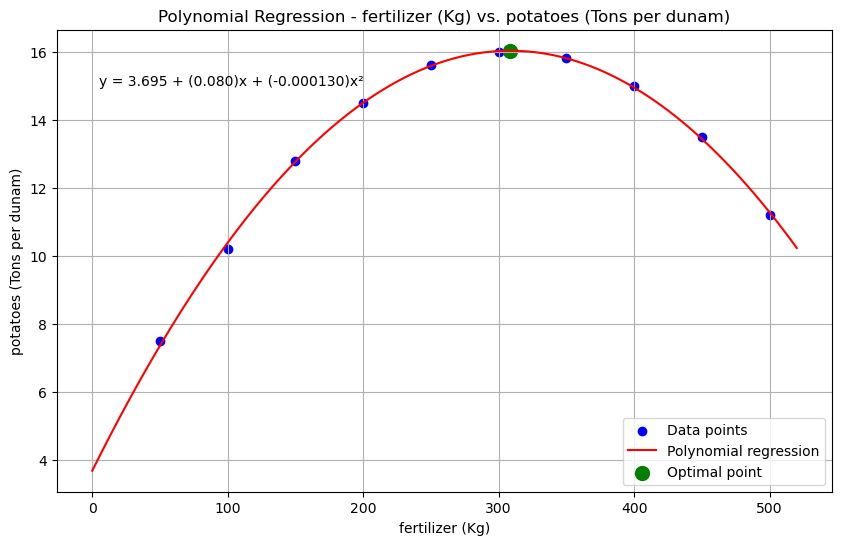

In [195]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import scipy.stats as stats

# Eexrcise 1.1

# data
fertilizer = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
potatoes = np.array([7.5, 10.2, 12.8, 14.5, 15.6, 16.0, 15.8, 15.0, 13.5, 11.2])

# Calculating products
fertilizer_squared = fertilizer ** 2
product_fertilizer_potatoes = fertilizer * potatoes
product_fertilizer_squared_potatoes = fertilizer_squared * potatoes

# Create DataFrame
df = pd.DataFrame({
    "x": fertilizer,
    "y": potatoes,
    "x^2": fertilizer_squared,
    "x * y": product_fertilizer_potatoes,
    "x^2 * y": product_fertilizer_squared_potatoes
})

# Calculate totals
totals = df.sum(axis=0) 

# Display the DataFrame
print("Solution 1:")
display(df)
print("\nTotals:")
print(totals)

# Fit a polynomial of degree 2 using np.polyfit
coefficients = np.polyfit(fertilizer, potatoes, 2)

# Extract the coefficients
a = coefficients[0]  
b = coefficients[1]  
c = coefficients[2] 

# Eexrcise 1.2

# Equation
print("\nSolution 2:")
equation = f"y = {c:.3f} + ({b:.3f})x + ({a:.6f})x²"
print(f"Polynomial equation: {equation}")

# Eexrcise 1.3

# Find optimal fertilizer amount (vertex of the parabola)
print("\nSolution 3:")
optimal_fertilizer = -b / (2 * a)
print(f"Optimal kilogram of fertilizer: {optimal_fertilizer:.2f}")

# Create a polynomial function using the coefficients
poly_function = np.poly1d(coefficients)

# Eexrcise 1.4

# Calculate the maximum amount of potatoes
print("\nSolution 4:")
max_amount = poly_function(optimal_fertilizer)
print(f"Predicted maximum amount of potatoes: {max_amount:.2f} tons per dunam")
print()

# Create smooth curve for plotting
x_curve = np.linspace(0, 520, 100)
y_curve = poly_function(x_curve)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(fertilizer, potatoes, color='blue', label='Data points')
plt.plot(x_curve, y_curve, color='red', label='Polynomial regression')
plt.scatter([optimal_fertilizer], [max_amount], color='green', s=100, label='Optimal point')

# Add labels
plt.title('Polynomial Regression - fertilizer (Kg) vs. potatoes (Tons per dunam)')
plt.xlabel('fertilizer (Kg)')
plt.ylabel('potatoes (Tons per dunam)')
plt.grid(True)
plt.legend()

# Display equation on the graph
plt.text(5, 15, equation, fontsize=10)
plt.show()

In [242]:
# Eexrcise 2.1

# Data
fertilizer = np.array([100, 150, 200, 250, 300, 200, 200, 200, 200, 200, 200, 200, 200, 200])
water = np.array([5, 5, 5, 5, 5, 3, 4, 6, 7, 5, 5, 5, 5, 5])
temperature = np.array([20, 20, 20, 20, 20, 20, 20, 20, 20, 15, 18, 22, 25, 28])
corn_crop = np.array([2.5, 3.2, 3.8, 4.1, 3.9, 3.0, 3.5, 3.9, 3.7, 3.2, 3.6, 3.7, 3.5, 3.1])

# Combine features
X = np.column_stack((fertilizer, water, temperature))
y = corn_crop

# Polynomial features up to degree 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Train linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Get feature names
feature_names = poly.get_feature_names_out(['X1', 'X2', 'X3'])

equation = f"y = {model.intercept_:.2f}"

for coef, name in zip(model.coef_[1:], feature_names[1:]):
    name = name.replace(" ", "")
    sign = " + " if coef >= 0 else " - "
    equation += f"{sign}{abs(coef):.4f}*{name}"
    
print("Solution 1:")
print(equation)

# Eexrcise 2.2

# Predict yields on the original data
y_pred = model.predict(X_poly)

# Find the index of the maximum predicted yield
max_index = np.argmax(y_pred)

# Get the optimal input values and predicted yield
optimal_fertilizer = fertilizer[max_index]
optimal_water = water[max_index]
optimal_temp = temperature[max_index]
optimal_yield = y_pred[max_index]

# Print optimal values
print("\nSolution 2:")
print(f"Optimal Fertilizer: {optimal_fertilizer}")
print(f"Optimal Water: {optimal_water}")
print(f"Optimal Temperature: {optimal_temp}")
print(f"Maximum Predicted Corn Yield: {optimal_yield:.2f}")

Solution 1:
y = -1.37 + 0.0000*X1 - 0.0000*X2 - 0.0000*X3 + 0.0003*X1^2 + 0.0001*X1X2 + 0.0002*X1X3 - 0.0000*X2^2 - 0.0000*X2X3 - 0.0000*X3^2 - 0.0000*X1^3 - 0.0001*X1^2X2 + 0.0000*X1^2X3 + 0.0001*X1X2^2 + 0.0009*X1X2X3 - 0.0002*X1X3^2 - 0.0083*X2^3 - 0.0000*X2^2X3 - 0.0001*X2X3^2 + 0.0006*X3^3

Solution 2:
Optimal Fertilizer: 250
Optimal Water: 5
Optimal Temperature: 20
Maximum Predicted Corn Yield: 4.08


In [244]:
# Eexrcise 3.1

# It's important to scale the features to similar ranges to get batter and faster converges of gradient descent when working with multiple variables.
# By scaling, we ensure that no single feature can dominate the optimization process or the model's decisions due to its scale.
# Each feature is given an equal opportunity to influence the model, making the model's performance more robust and generalizable. 
# The model becomes sensitive to actual patterns in the data rather than being swayed by the scale of the data.

# data
x1 = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
x2 = np.array([100, 90, 80, 70, 60, 50, 40, 30, 20, 10])

# Eexrcise 3.2

# Create DataFrame
data = pd.DataFrame({
    "x1": x1,
    "x2": x2
})

print(data)

# Eexrcise 3.3

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data)
print("\nMin-Max Scaled Data:")
print(data_minmax)

# Eexrcise 3.4

# Standardization
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(data)
print("\nStandardized Data:")
print(data_standardized)

# Eexrcise 3.5

# Min-Max scaling transforms features to a range between 0 and 1 by subtructing the minimum value from each sample and dividing by the maximum value minus the minimum value.
# Standardization transforms features to have a mean of 0 and a standard deviation of 1 by subtructing the average value of the data samples from each sample and dividing by the standard deviation.

   x1   x2
0   5  100
1  10   90
2  15   80
3  20   70
4  25   60
5  30   50
6  35   40
7  40   30
8  45   20
9  50   10

Min-Max Scaled Data:
[[0.         1.        ]
 [0.11111111 0.88888889]
 [0.22222222 0.77777778]
 [0.33333333 0.66666667]
 [0.44444444 0.55555556]
 [0.55555556 0.44444444]
 [0.66666667 0.33333333]
 [0.77777778 0.22222222]
 [0.88888889 0.11111111]
 [1.         0.        ]]

Standardized Data:
[[-1.5666989   1.5666989 ]
 [-1.21854359  1.21854359]
 [-0.87038828  0.87038828]
 [-0.52223297  0.52223297]
 [-0.17407766  0.17407766]
 [ 0.17407766 -0.17407766]
 [ 0.52223297 -0.52223297]
 [ 0.87038828 -0.87038828]
 [ 1.21854359 -1.21854359]
 [ 1.5666989  -1.5666989 ]]


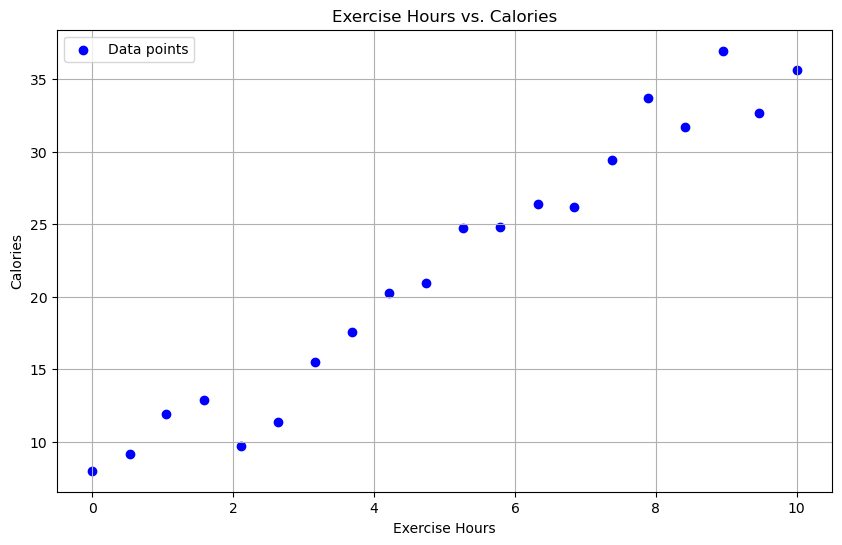

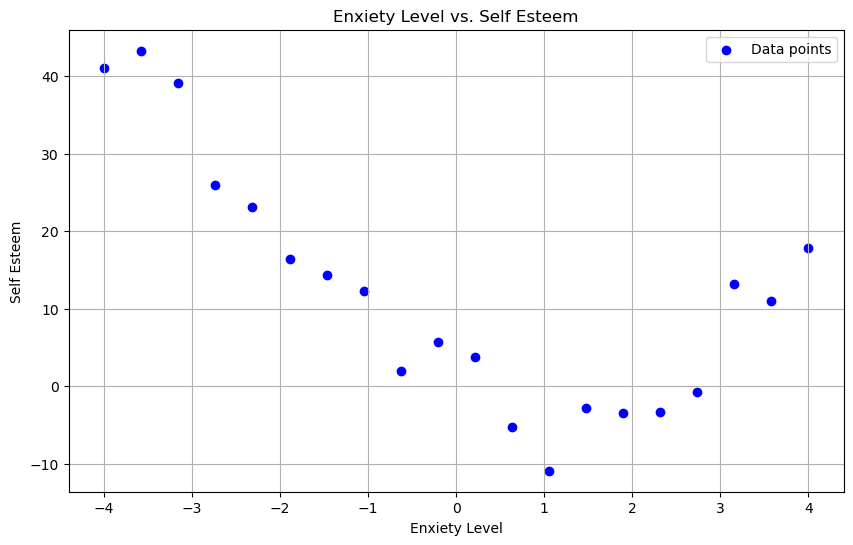

R²: 0.960691
MSE: 3.42



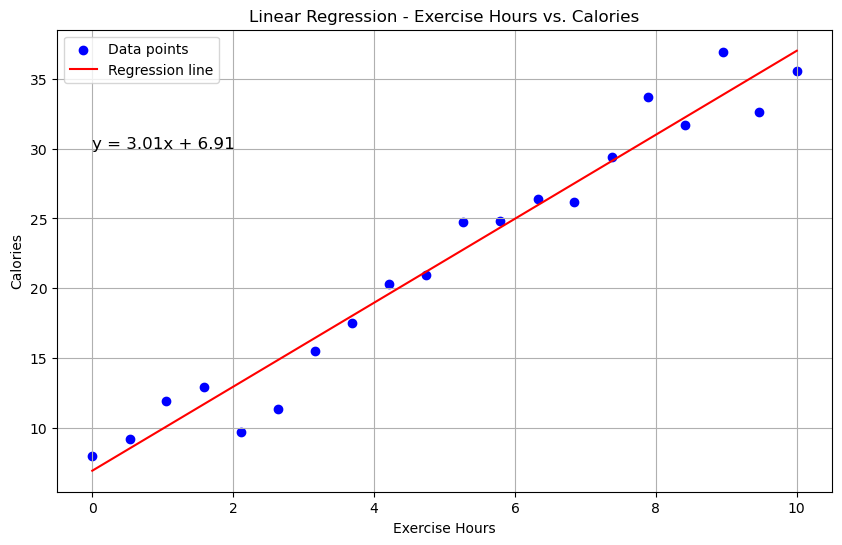

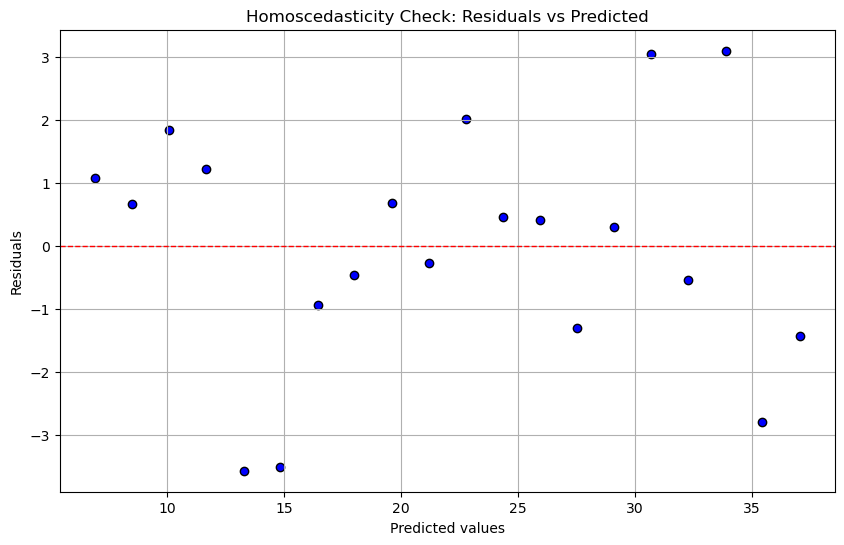

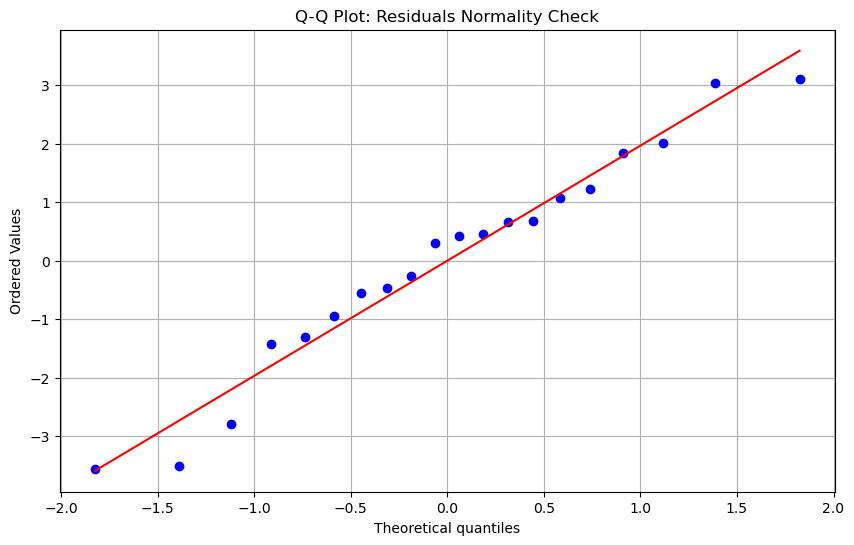


R²: 0.470051
MSE: 127.73



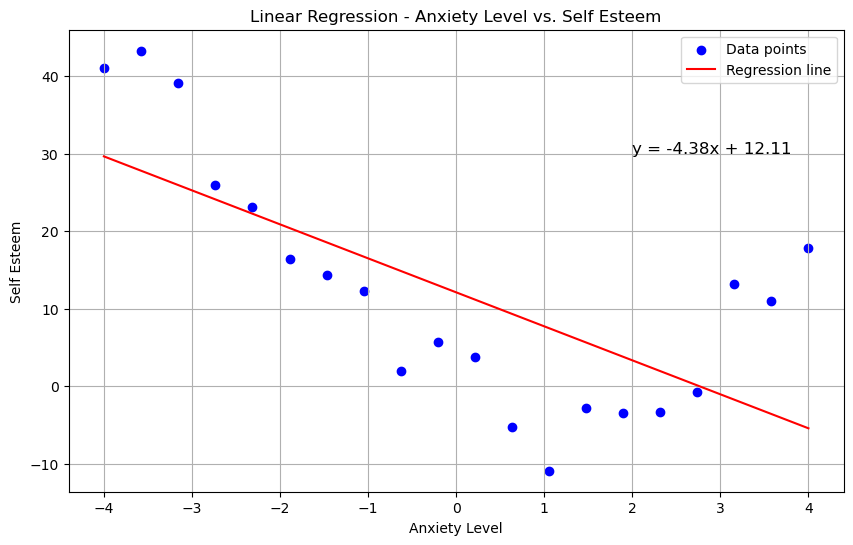

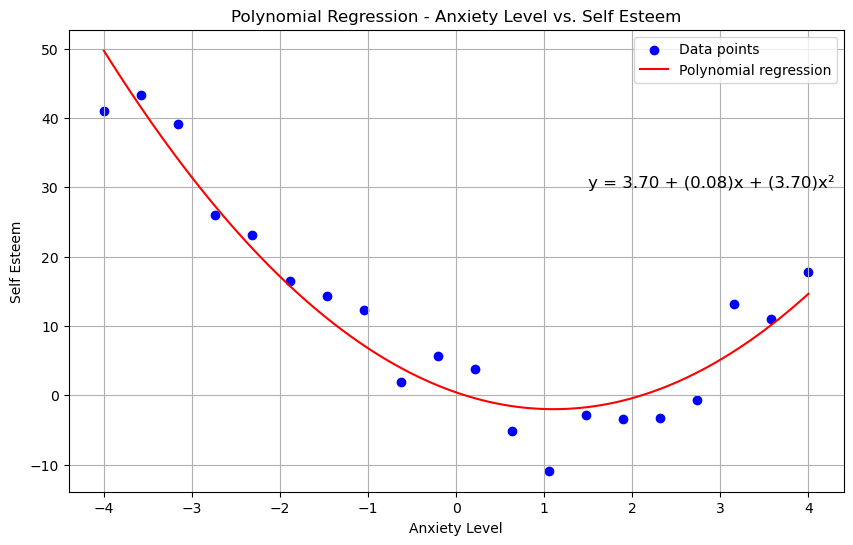

In [240]:
# Eexrcise 4.1

# data
exercise = np.array([0.0, 0.53, 1.05, 1.58, 2.11, 2.63, 3.16, 3.68, 4.21, 4.74, 5.26, 5.79, 6.32, 6.84, 7.37, 7.89, 8.42, 8.95, 9.47, 10.0]).reshape(-1, 1)
calories = np.array([7.99, 9.17, 11.91, 12.89, 9.70, 11.32, 15.49, 17.53, 20.27, 20.92, 24.76, 24.80, 26.36, 26.21, 29.41, 33.71, 31.72, 36.96, 32.63, 35.60])

anxiety_level = np.array([-4.0, -3.58, -3.16, -2.74, -2.32, -1.89, -1.47, -1.05, -0.63, -0.21, 0.21, 0.63, 1.05, 1.47, 1.89, 2.32, 2.74, 3.16, 3.58, 4.0]).reshape(-1, 1)
self_esteem = np.array([41.02, 43.27, 39.14, 25.96, 23.08, 16.41, 14.31, 12.26, 1.91, 5.65, 3.80, -5.23, -10.89, -2.85, -3.41, -3.34, -0.75, 13.14, 11.03, 17.77])

# Create scatter plot for exercise and calories
plt.figure(figsize=(10, 6))
plt.scatter(exercise, calories, color='blue', label='Data points')

# Add labels in English
plt.title('Exercise Hours vs. Calories')
plt.xlabel('Exercise Hours')
plt.ylabel('Calories')
plt.grid(True)
plt.legend()
plt.show()

# Create scatter plot to anxiety level and self esteem
plt.figure(figsize=(10, 6))
plt.scatter(anxiety_level, self_esteem, color='blue', label='Data points')

# Add labels in English
plt.title('Enxiety Level vs. Self Esteem')
plt.xlabel('Enxiety Level')
plt.ylabel('Self Esteem')
plt.grid(True)
plt.legend()
plt.show()

# we can see that there is a linear trend in the data of exercise and calories but we can see that there isn't linear trend in data of enxiety level and self esteem.

# Eexrcise 4.2

# Create regression model
model = LinearRegression()
model.fit(exercise, calories)

# Make predictions
calories_pred = model.predict(exercise)

# Evaluate the model
r2 = r2_score(calories, calories_pred)
mse = mean_squared_error(calories, calories_pred)

print(f"R²: {r2:.6f}")
print(f"MSE: {mse:.2f}")
print()

# Calculate equation
equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}"

# Create the graph
plt.figure(figsize=(10, 6))
plt.scatter(exercise, calories, color='blue', label='Data points')
plt.plot(exercise, model.predict(exercise), color='red', label='Regression line')

# Add labels in English
plt.title('Linear Regression - Exercise Hours vs. Calories')
plt.xlabel('Exercise Hours')
plt.ylabel('Calories')
plt.grid(True)
plt.legend()

# Display equation on the graph
text = plt.text(0, 30, equation, fontsize=12)
plt.show()

# Residuals
residuals = calories - calories_pred

plt.figure(figsize=(10, 6))
plt.scatter(calories_pred, residuals, color='blue', edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot: Residuals Normality Check")
plt.grid(True)
plt.show()

# we can see from the graph and the low mse and the high R^2 that linear model fit well to the data sample and there is linear link between exercise hours and calories.
# we can also see that the variance of the errors are the same across all levels and that the residuals of the model are normally distributed.

# Eexrcise 4.3

# Create regression model
model = LinearRegression()
model.fit(anxiety_level, self_esteem)

# Make predictions
self_esteem_pred = model.predict(anxiety_level)

# Evaluate the model
r2 = r2_score(self_esteem, self_esteem_pred)
mse = mean_squared_error(self_esteem, self_esteem_pred)

print()
print(f"R²: {r2:.6f}")
print(f"MSE: {mse:.2f}")
print()

# Calculate equation
equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}"

# Create the graph
plt.figure(figsize=(10, 6))
plt.scatter(anxiety_level, self_esteem, color='blue', label='Data points')
plt.plot(anxiety_level, model.predict(anxiety_level), color='red', label='Regression line')

# Add labels in English
plt.title('Linear Regression - Anxiety Level vs. Self Esteem')
plt.xlabel('Anxiety Level')
plt.ylabel('Self Esteem')
plt.grid(True)
plt.legend()

# Display equation on the graph
text = plt.text(2, 30, equation, fontsize=12)
plt.show()

# we can see from the graph and the high mse and the low R^2 that linear model doesn't fit well to the data sample and there isn't linear link between anxiety_level and self_esteem.

# Create polynomial regression model (degree 2)
polynomial_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Fit the model
polynomial_model.fit(anxiety_level, self_esteem)

# Create smooth curve for plotting
x_curve = np.linspace(-4, 4, 100).reshape(-1, 1)
y_curve = polynomial_model.predict(x_curve)

# Equation
poly_equation = f"y = {intercept:.2f} + ({coefficients[1]:.2f})x + ({coefficients[2]:.2f})x²"

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(anxiety_level, self_esteem, color='blue', label='Data points')
plt.plot(x_curve, y_curve, color='red', label='Polynomial regression')

# Add labels
plt.title('Polynomial Regression - Anxiety Level vs. Self Esteem')
plt.xlabel('Anxiety Level')
plt.ylabel('Self Esteem')
plt.grid(True)
plt.legend()

# Display equation on the graph
plt.text(1.5, 30, poly_equation, fontsize=12)

plt.show()

# we can see from the graph that polynomial with degree of 2 model fit well to the data sample and there is polynomial link between anxiety_level and self_esteem.
